TASK 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load dataset
df = pd.read_csv("/content/Dataset .csv")

In [ ]:
# Display columns and data types
columns_list = df.columns.tolist()
print("Columns in the dataset:")
print(columns_list)
print(df.dtypes)

Columns in the dataset:
['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              ob

In [ ]:
# Drop non-numeric column and encode categorical columns
x = df.drop("Aggregate rating", axis=1)
y = df["Aggregate rating"]
x = pd.get_dummies(x, drop_first=True)

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Make predictions and evaluate the model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Display results and feature importances
print("Mean squared Error(MSE):", mse)
print("R-squared(R2):", r2)

Mean squared Error(MSE): 0.047849293563579275
R-squared(R2): 0.9789775912457193


In [ ]:
importance = model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
print("\nMost Influential Features Task 1:")
print(sorted_features)


Most Influential Features Task 1:
                                                Feature    Importance
20825                             Rating text_Not rated  8.966539e-01
20819                               Rating color_Orange  5.152611e-02
20820                                  Rating color_Red  2.219755e-02
20824                                  Rating text_Good  1.308405e-02
20827                             Rating text_Very Good  2.579984e-03
...                                                 ...           ...
14179  Address_Near Pristine Mall, Sector 31, Faridabad -2.017661e-19
16524              Locality_Aggarwal City Plaza, Rohini -3.026492e-19
7538                                        City_Nashik -4.035323e-19
17995        Locality Verbose_Defence Colony, New Delhi -4.035323e-19
17699                    Locality_Worldmark 1, Aerocity -1.614129e-18

[20828 rows x 2 columns]


TASK 2

In [ ]:
# Import necessary libraries for Task 2
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv("/content/Dataset .csv")

In [ ]:
# Lowercase Cuisines and encode them
df['Cuisines'] = df['Cuisines'].str.lower()
le = LabelEncoder()
df['Cuisine_Encoded'] = le.fit_transform(df['Cuisines'])


In [ ]:
# Prepare data for training
x = df[['Cuisine_Encoded']]
y = df['Aggregate rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Make predictions and evaluate the model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Display results and predict a rating for sample user preferences
print("Mean square Error(MSE):", mse)
print("R_square(R2):", r2)

Mean square Error(MSE): 1.941493078539205
R_square(R2): 0.1470122534531093


In [ ]:
sample_user_preferences = 'Italian,Chinese'
preferences_list = [pref.strip().lower() for pref in sample_user_preferences.split(',')]
encoded_preferences = le.transform(preferences_list)
encoded_preferences_reshaped = encoded_preferences.reshape(-1, 1)
predicted_rating = model.predict(encoded_preferences_reshaped)[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(f"predicted Rating for user preferences:{sample_user_preferences}:{predicted_rating:.2f}")

predicted Rating for user preferences:Italian,Chinese:3.54


TASK 3

In [ ]:
# Import necessary libraries for Task 3
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Generate synthetic data
np.random.seed(42)
num_sample = 1000
num_features = 5
x = np.random.randn(num_sample, num_features)
y = np.random.randint(2, size=num_sample)


In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Define parameter grid for GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
# Get the best logistic regression model
best_logistic_model = grid_search.best_estimator_

In [ ]:
# Make predictions and evaluate the model
y_pred = best_logistic_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

In [ ]:
# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.48
Precision: 0.47259467040673214
Recall: 0.48
F1-score: 0.46049999999999996
Confusion Matrix:
 [[28 70]
 [34 68]]


TASK 4

In [ ]:
import pandas as pd
import folium
from folium import plugins

In [ ]:
# Load dataset and create a map with restaurant markers
df = pd.read_csv("/content/Dataset .csv")
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
map_restaurants = folium.Map(location=map_center, zoom_start=12)

In [ ]:
for index, row in df.iterrows():
    popup_text = f"Restaurant: {row['Restaurant Name']}<br>Location: {row['Locality']},{row['City']}<br>Cuisines:{row['Cuisines']}<br>Rating:{row['Aggregate rating']}"
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text).add_to(map_restaurants)

In [ ]:
# Save the map as an HTML file
map_restaurants.save("restaurant_map.html")


In [ ]:
# Analyze restaurant count and average rating by city
restaurant_count_by_city = df.groupby('City').size().reset_index(name='Restaurant Count')
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().reset_index(name='Average Rating')

In [ ]:
# Display restaurant count and average rating by city
print(restaurant_count_by_city)
print(average_rating_by_city)


                City  Restaurant Count
0          Abu Dhabi                20
1               Agra                20
2          Ahmedabad                21
3             Albany                20
4          Allahabad                20
..               ...               ...
136          Weirton                 1
137  Wellington City                20
138   Winchester Bay                 1
139          Yorkton                 1
140        ��stanbul                14

[141 rows x 2 columns]
                City  Average Rating
0          Abu Dhabi        4.300000
1               Agra        3.965000
2          Ahmedabad        4.161905
3             Albany        3.555000
4          Allahabad        3.395000
..               ...             ...
136          Weirton        3.900000
137  Wellington City        4.250000
138   Winchester Bay        3.200000
139          Yorkton        3.300000
140        ��stanbul        4.292857

[141 rows x 2 columns]


In [ ]:
# Create a boxplot to show the distribution of ratings by city
import seaborn as sns
import matplotlib.pyplot as plt

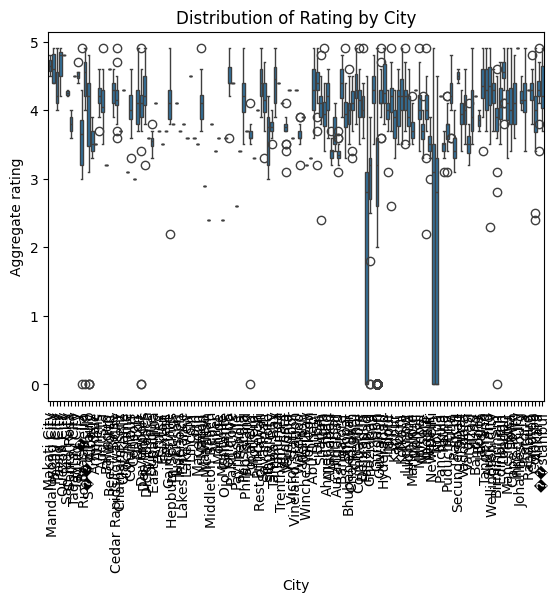

In [ ]:
sns.boxplot(x='City', y='Aggregate rating', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Rating by City')
plt.show()